In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
tfkl = tfk.layers

In [16]:
import keras
from keras.datasets import cifar10
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras.models import Model
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, UpSampling2D

1. Autoencoder

In [17]:
# load in dataset
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [19]:
# RGB 0-255 convert to 0-1
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [20]:
# build the model
input_img = Input(shape=(32,32,3))

m1 = Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu')(input_img)
m1 = MaxPooling2D((2, 2), padding='same')(m1)

m1 = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(m1)
m1 = MaxPooling2D((2, 2), padding='same')(m1)

m1 = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(m1)
encoded = MaxPooling2D((2, 2), padding='same')(m1)

##

m1 = Conv2D(8, kernel_size =  (3, 3), activation='relu', padding='same')(encoded)
m1 = UpSampling2D((2, 2))(m1)

m1 = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(m1)
m1 = UpSampling2D((2, 2))(m1)

m1 = Conv2D(32, kernel_size = (3, 3), activation='relu',padding='same')(m1)
m1 = UpSampling2D((2, 2))(m1)

output = Conv2D(3, kernel_size = (3, 3), activation='relu', padding='same')(m1)


autoencoder = Model(input_img, output)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 8)         2312      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)          

In [21]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
391/391 [==============================] - 158s 405ms/step - loss: 0.0355 - accuracy: 0.4130 - val_loss: 0.0209 - val_accuracy: 0.4287
Epoch 2/10
391/391 [==============================] - 161s 412ms/step - loss: 0.0192 - accuracy: 0.4708 - val_loss: 0.0176 - val_accuracy: 0.5539
Epoch 3/10
391/391 [==============================] - 159s 406ms/step - loss: 0.0161 - accuracy: 0.5854 - val_loss: 0.0153 - val_accuracy: 0.6119
Epoch 4/10
391/391 [==============================] - 159s 407ms/step - loss: 0.0148 - accuracy: 0.6131 - val_loss: 0.0144 - val_accuracy: 0.6238
Epoch 5/10
391/391 [==============================] - 159s 406ms/step - loss: 0.0141 - accuracy: 0.6231 - val_loss: 0.0139 - val_accuracy: 0.6241
Epoch 6/10
391/391 [==============================] - 159s 405ms/step - loss: 0.0136 - accuracy: 0.6288 - val_loss: 0.0136 - val_accuracy: 0.6360
Epoch 7/10
391/391 [==============================] - 158s 403ms/step - loss: 0.0132 - accuracy: 0.6334 - val_loss: 0.0131 -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


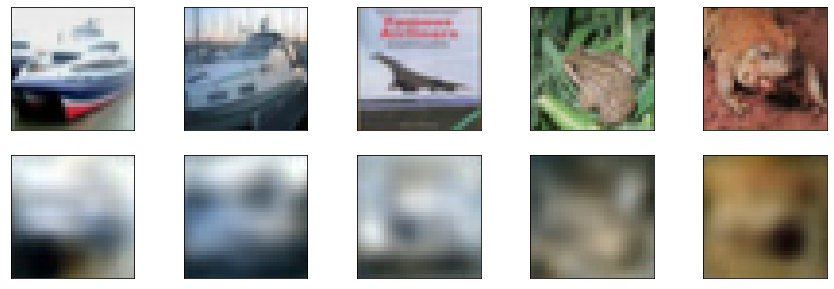

In [22]:
new_img = autoencoder.predict(X_test)

plt.figure(figsize=(15,5))
for i in range(1,6):
    # original
    ax = plt.subplot(2, 5, i)
    plt.imshow(X_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new
    ax = plt.subplot(2, 5, i + 5)
    plt.imshow(new_img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

2. Image Classification - Deep CNN

In [23]:
image_cnn = Sequential()
image_cnn.add(tfkl.Conv2D(32, 3, activation='relu', 
                          input_shape=(32, 32, 3)))
image_cnn.add(tfkl.MaxPooling2D(2))
image_cnn.add(tfkl.Conv2D(64, 3, activation='relu'))
image_cnn.add(tfkl.MaxPooling2D(2))
image_cnn.add(tfkl.Conv2D(64, 3, activation='relu'))

image_cnn.add(tfkl.Flatten())
image_cnn.add(tfkl.Dense(64, activation='relu'))
image_cnn.add(tfkl.Dropout(rate=0.3))
image_cnn.add(tfkl.Dense(10))

image_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [24]:
image_cnn.compile(optimizer='adam',loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

history = image_cnn.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.6578 - accuracy: 0.3849 - val_loss: 1.3297 - val_accuracy: 0.5256
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2970 - accuracy: 0.5359 - val_loss: 1.1535 - val_accuracy: 0.5817
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1739 - accuracy: 0.5839 - val_loss: 1.0457 - val_accuracy: 0.6241
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0773 - accuracy: 0.6203 - val_loss: 0.9857 - val_accuracy: 0.6564
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0086 - accuracy: 0.6453 - val_loss: 0.9459 - val_accuracy: 0.6631
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9542 - accuracy: 0.6660 - val_loss: 0.9160 - val_accuracy: 0.6822
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9061 - accuracy: 0.6828 - val_loss: 0.9101 -

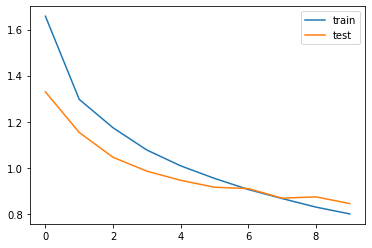

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['train','test'])

2.2 Transfer Learning

In [27]:
vgg = VGG16(input_shape=(32,32,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

x = tfkl.Flatten()(vgg.output)
prediction = tfkl.Dense(10)(x)
vgg_model = Model(inputs=vgg.input, outputs=prediction)
vgg_model.compile(loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer='adam',
                    metrics=['accuracy'])
vgg_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_______________________________________________________

In [29]:
history = vgg_model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 660s 422ms/step - loss: 1.4315 - accuracy: 0.5123 - val_loss: 1.3571 - val_accuracy: 0.5307
Epoch 2/5
1563/1563 [==============================] - 656s 419ms/step - loss: 1.2958 - accuracy: 0.5571 - val_loss: 1.2971 - val_accuracy: 0.5526
Epoch 3/5
1563/1563 [==============================] - 657s 420ms/step - loss: 1.2437 - accuracy: 0.5735 - val_loss: 1.2627 - val_accuracy: 0.5616
Epoch 4/5
1563/1563 [==============================] - 657s 420ms/step - loss: 1.2136 - accuracy: 0.5839 - val_loss: 1.2426 - val_accuracy: 0.5685
Epoch 5/5
1563/1563 [==============================] - 661s 423ms/step - loss: 1.1927 - accuracy: 0.5904 - val_loss: 1.2300 - val_accuracy: 0.5722


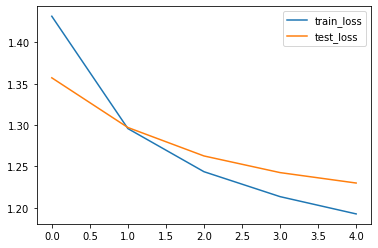

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['train_loss','test_loss'])

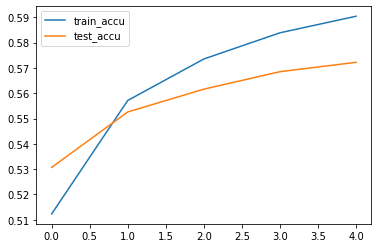

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(labels=['train_accu','test_accu'])

3. Text Classification

In [34]:
from google.colab import files
data = files.upload()

Saving SPAM_detection.csv to SPAM_detection (1).csv


In [36]:
data=pd.read_csv('SPAM_detection.csv')

In [38]:
data

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [39]:
# data preprocess
# transform to lower case
data['Message'] = data['Message'].str.lower()
text = data['Message'].values
cat = data['category_val'].values

In [40]:
# transform to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
text = tokenizer.texts_to_sequences(text)
text = sequence.pad_sequences(text)

In [41]:
text.shape, cat.shape

((5572, 189), (5572,))

In [50]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
# split the data randomly
X_train,X_test,y_train,y_test = train_test_split(text,cat,test_size=0.30,random_state=20)

In [51]:
from keras.layers import LSTM
# RNN
text_rnn = tfk.Sequential([tfkl.Embedding(len(tokenizer.word_index)+1,10,input_length=trainX.shape[1]),
  # LSTM
  tfkl.LSTM(64,return_sequences=True),
  # decrease dimension
  tfkl.GlobalMaxPool1D(),
  tfkl.Dropout(0.3),
  tfkl.Dense(1,activation='sigmoid')                                
])

# binary_crossentropy
text_rnn.compile(optimizer = tfk.optimizers.RMSprop(),loss = 'binary_crossentropy')
text_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 10)            90050     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 64)            19200     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 109,315
Trainable params: 109,315
Non-trainable params: 0
_________________________________________________________________


In [54]:
text_rnn.fit(X_train,y_train,
              epochs=10,batch_size=189,
              validation_data=(X_test,y_test))

Epoch 1/10
21/21 [==============================] - 7s 348ms/step - loss: 0.0131 - val_loss: 0.0562
Epoch 2/10
21/21 [==============================] - 7s 347ms/step - loss: 0.0136 - val_loss: 0.0586
Epoch 3/10
21/21 [==============================] - 7s 343ms/step - loss: 0.0091 - val_loss: 0.0642
Epoch 4/10
21/21 [==============================] - 7s 347ms/step - loss: 0.0080 - val_loss: 0.0641
Epoch 5/10
21/21 [==============================] - 7s 349ms/step - loss: 0.0099 - val_loss: 0.0612
Epoch 6/10
21/21 [==============================] - 7s 344ms/step - loss: 0.0072 - val_loss: 0.0655
Epoch 7/10
21/21 [==============================] - 8s 403ms/step - loss: 0.0066 - val_loss: 0.0639
Epoch 8/10
21/21 [==============================] - 7s 342ms/step - loss: 0.0052 - val_loss: 0.0683
Epoch 9/10
21/21 [==============================] - 7s 350ms/step - loss: 0.0043 - val_loss: 0.0653
Epoch 10/10
21/21 [==============================] - 7s 346ms/step - loss: 0.0062 - val_loss: 0.0694

In [56]:
rnn_pred = text_rnn.predict(X_test)

In [58]:
# CNN
text_cnn = tfk.Sequential([
  # relu fucntion
  tfkl.Conv1D(filters= 64,kernel_size=2,strides=1,activation='relu',padding='same',input_shape=(X_train.shape[1],1)),
  tfkl.MaxPooling1D(pool_size=2,padding='same'),
  tfkl.Conv1D(filters = 64, kernel_size=2,strides=1,activation='relu',padding='same'),
  tfkl.Dropout(0.3),
  tfkl.Conv1D(32,kernel_size=2,strides=1,activation='relu',padding='same'),
  tfkl.Flatten(),
  tfkl.Dense(16,activation='relu'),
  tfkl.Dense(1,activation='sigmoid')                     
])
text_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 189, 64)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 95, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 95, 64)            8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 95, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 95, 32)            4128      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3040)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)               

In [59]:
X_train = X_train[:,:,None]
X_test = X_test[:,:,None]
text_cnn.compile(optimizer = tfk.optimizers.Adam(),loss = 'binary_crossentropy')

In [60]:
text_cnn.fit(X_train,y_train, epochs = 10,
             batch_size = 32,
             validation_data=(X_test,y_test))

Epoch 1/10
122/122 [==============================] - 3s 22ms/step - loss: 3.5095 - val_loss: 0.3707
Epoch 2/10
122/122 [==============================] - 3s 22ms/step - loss: 0.3759 - val_loss: 0.3051
Epoch 3/10
122/122 [==============================] - 3s 21ms/step - loss: 0.3139 - val_loss: 0.2935
Epoch 4/10
122/122 [==============================] - 3s 22ms/step - loss: 0.2967 - val_loss: 0.2823
Epoch 5/10
122/122 [==============================] - 3s 21ms/step - loss: 0.2848 - val_loss: 0.2787
Epoch 6/10
122/122 [==============================] - 3s 21ms/step - loss: 0.2801 - val_loss: 0.2786
Epoch 7/10
122/122 [==============================] - 3s 22ms/step - loss: 0.2759 - val_loss: 0.2784
Epoch 8/10
122/122 [==============================] - 3s 22ms/step - loss: 0.2741 - val_loss: 0.2713
Epoch 9/10
122/122 [==============================] - 3s 21ms/step - loss: 0.2762 - val_loss: 0.2809
Epoch 10/10
122/122 [==============================] - 3s 21ms/step - loss: 0.2710 - val_lo

In [62]:
cnn_pred = text_cnn.predict(X_test)

In [64]:
# Plot ROC Curve
from sklearn.metrics import auc

rnn_fpr, rnn_tpr, rnn_ = roc_curve(y_test, rnn_pred)
rnn_auc = auc(rnn_fpr, rnn_tpr)

cnn_fpr,cnn_tpr, cnn_ = roc_curve(y_test, cnn_pred)
cnn_auc = auc(cnn_fpr, cnn_tpr)

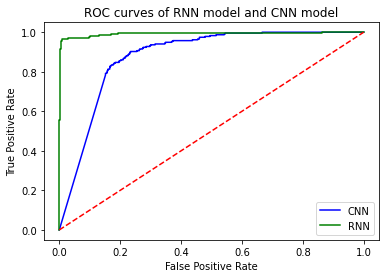

In [74]:
plt.title('ROC curves of RNN model and CNN model')
plt.plot(cnn_fpr, cnn_tpr, 'b', label = 'CNN')
plt.plot(rnn_fpr,rnn_tpr,'g',label='RNN')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
# End